Уральсков Евгений ПИ18-2

Appliances Energy Prediction  
https://www.kaggle.com/loveall/appliances-energy-prediction  
Вариант 3 Построение модели и оптимизация гиперпараметров.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('KAG_energydata_complete.csv')
print(f'Кол-во записей: {len(df)}')
print(f'Кол-во колонок: {len(df.columns)}')
df.head()

Кол-во записей: 19735
Кол-во колонок: 29


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

date time year-month-day hour:minute:second  
Appliances, energy use in Wh  
lights, energy use of light fixtures in the house in Wh  
T1, Temperature in kitchen area, in Celsius  
RH1, Humidity in kitchen area, in % T2, Temperature in living room area, in Celsius RH2, Humidity in living room area, in %  
T3, Temperature in laundry room area  
RH3, Humidity in laundry room area, in % T4, Temperature in office room, in Celsius RH4, Humidity in office room, in %  
T5, Temperature in bathroom, in Celsius  
RH5, Humidity in bathroom, in % T6, Temperature outside the building (north side), in Celsius RH6, Humidity outside the building (north side), in %  
T7, Temperature in ironing room , in Celsius  
RH7, Humidity in ironing room, in % T8, Temperature in teenager room 2, in Celsius RH8, Humidity in teenager room 2, in %  
T9, Temperature in parents room, in Celsius  
RH9, Humidity in parents room, in % To, Temperature outside (from Chievres weather station), in Celsius Pressure (from Chievres weather station), in mm Hg RHout, Humidity outside (from Chievres weather station), in %  
Wind speed (from Chievres weather station), in m/s  
Visibility (from Chievres weather station), in km  
Tdewpoint (from Chievres weather station), Â°C  
rv1, Random variable 1, nondimensional  
rv2, Random variable 2, nondimensional  

#### Нас интересует переменная Appliances, которая означает потребление электроэнергии приборами. Остальные переменные объясняют температуру и погоду. Также есть 2 абсолютно случайные переменные

In [5]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('-------------------------------------')

date
2016-02-01 07:50:00    1
2016-01-14 13:00:00    1
2016-05-04 13:10:00    1
2016-03-17 21:30:00    1
2016-01-24 12:10:00    1
                      ..
2016-05-02 03:20:00    1
2016-02-02 22:20:00    1
2016-03-31 16:20:00    1
2016-02-05 20:10:00    1
2016-03-06 10:40:00    1
Name: date, Length: 19735, dtype: int64
-------------------------------------
Appliances
50      4368
60      3282
40      2019
70      1560
80      1205
        ... 
870        1
890        1
900        1
860        1
1070       1
Name: Appliances, Length: 92, dtype: int64
-------------------------------------
lights
0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64
-------------------------------------
T1
21.000000    514
21.390000    484
21.200000    481
21.500000    458
21.290000    455
            ... 
24.594545      1
24.708182      1
24.753636      1
22.496667      1
24.417857      1
Name: T1, Length: 722, dtype: int64
-------------

#### Преобразуем столбец даты в 4 столбца: год, месяц, день, время

In [21]:
date_time = df['date'].str.split(' ').tolist()

for i in range(len(date_time)):
    date_time[i][0] = date_time[i][0].split('-')
    date_time[i][1] = int(date_time[i][1].split(':')[0])*60 + int(date_time[i][1].split(':')[1])
    

In [22]:
for i in range(len(date_time)):
    date_time[i][0].append(date_time[i][1])
    date_time[i] = date_time[i][0]

In [24]:
date_time = pd.DataFrame(date_time, columns=['year','month','day', 'time'])

In [26]:
df = pd.concat([df.drop(['date'], axis=1), date_time], axis=1)

In [27]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,day,time
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016,01,11,1020
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016,01,11,1030
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016,01,11,1040
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016,01,11,1050
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016,01,11,1060


In [28]:
df.isna().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
year           0
month          0
day            0
time           0
dtype: int64

#### Пропущенных значений нету

In [29]:
for i in ['year','month','day', 'time']:
    print(i)
    print(df[i].value_counts())
    print('-------------------------------------')

year
2016    19735
Name: year, dtype: int64
-------------------------------------
month
03    4464
04    4320
02    4176
05    3853
01    2922
Name: month, dtype: int64
-------------------------------------
day
26    720
15    720
12    720
13    720
23    720
21    720
14    720
20    720
25    720
18    720
22    720
24    720
19    720
17    720
16    720
27    685
11    618
03    576
05    576
10    576
06    576
01    576
28    576
09    576
29    576
02    576
07    576
04    576
08    576
30    432
31    288
Name: day, dtype: int64
-------------------------------------
time
1050    138
1020    138
1030    138
1070    138
1080    138
       ... 
810     137
890     137
970     137
1130    137
0       137
Name: time, Length: 144, dtype: int64
-------------------------------------


#### Стобец year бесполезен, т.к. мы имеем данные только одного года

In [30]:
df = df.drop(columns=['year'])

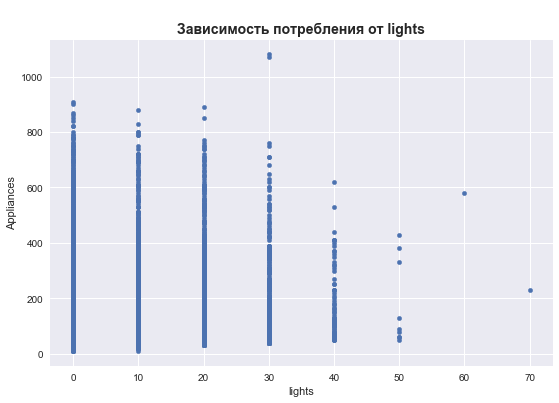

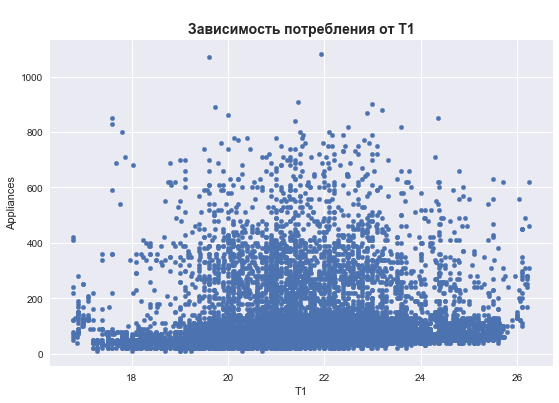

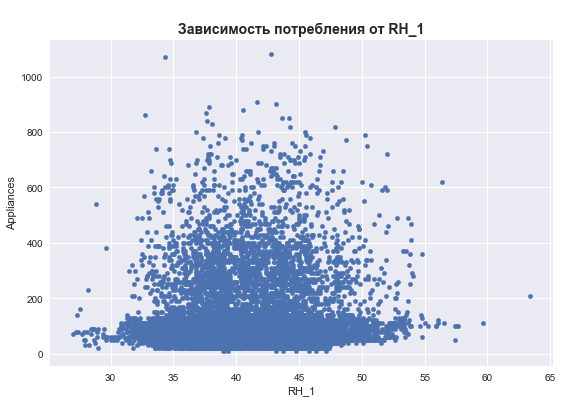

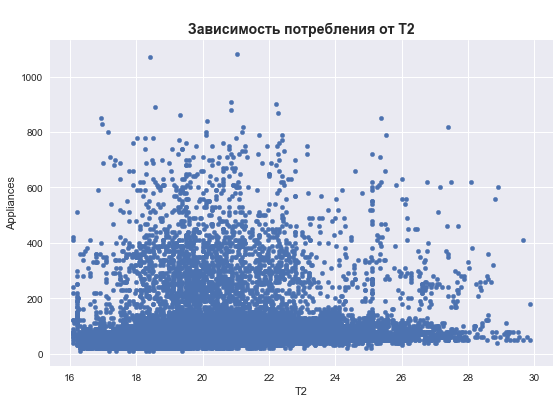

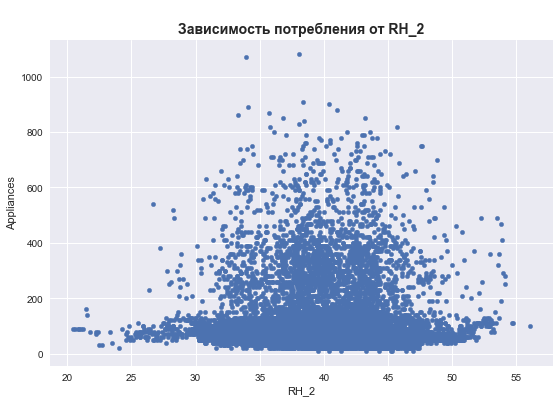

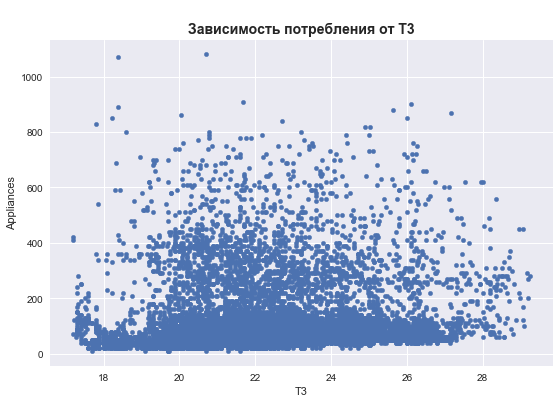

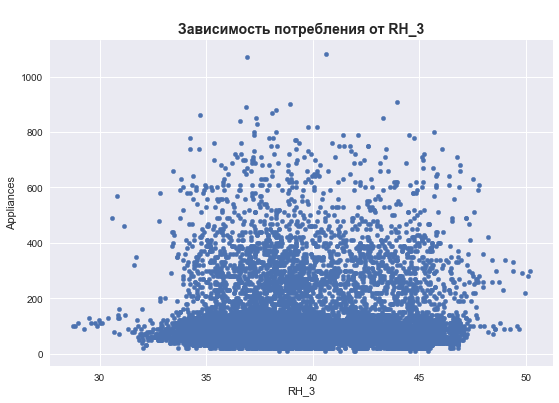

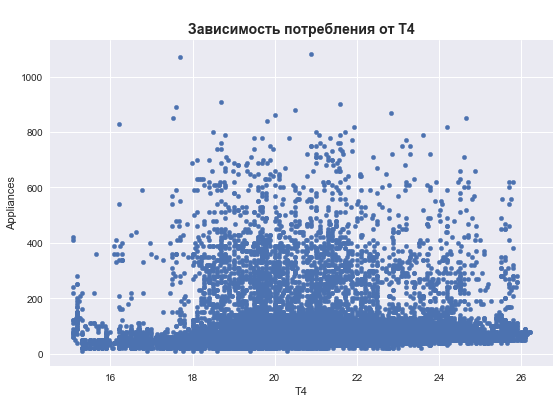

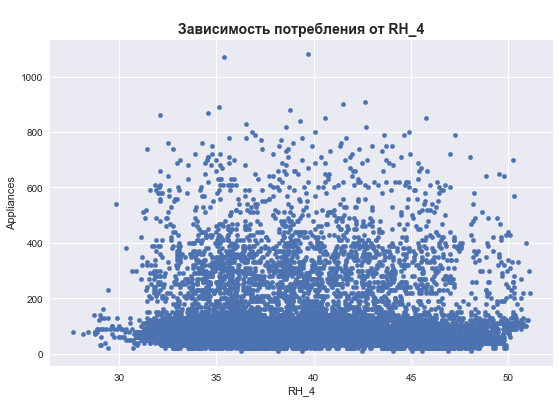

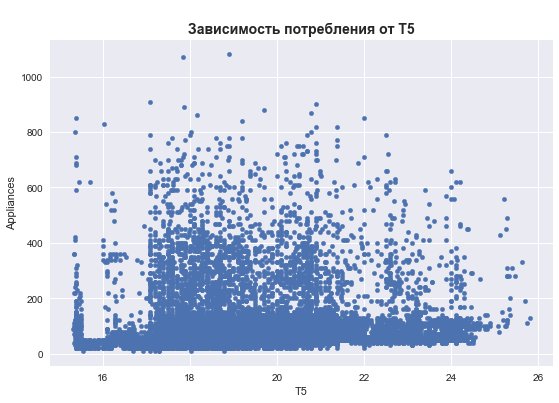

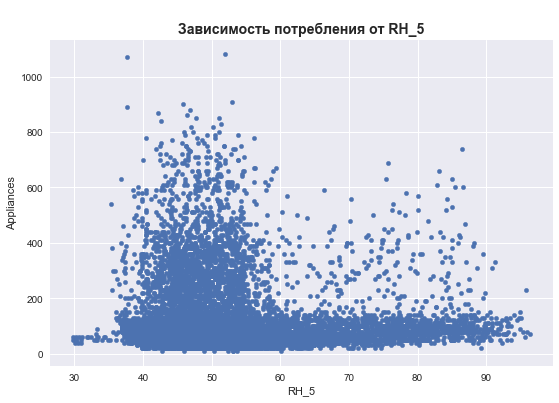

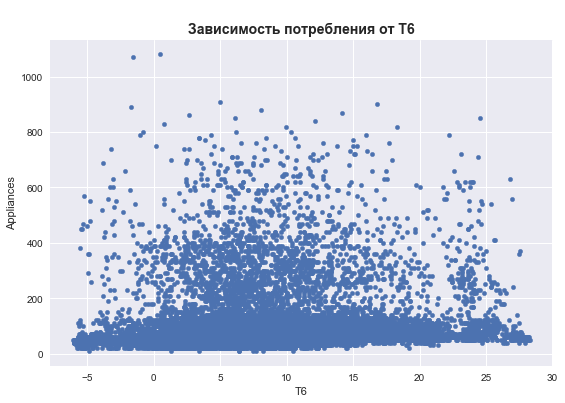

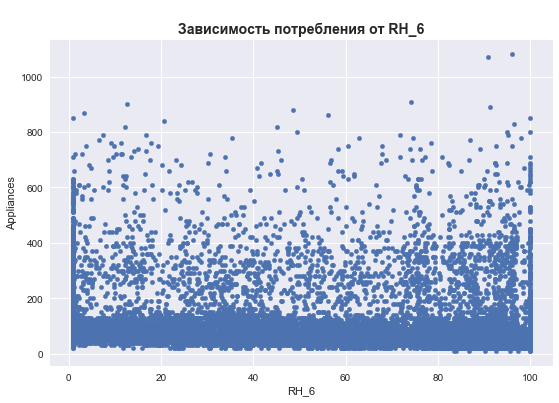

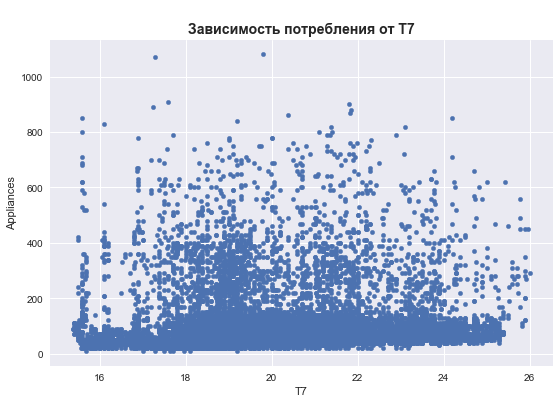

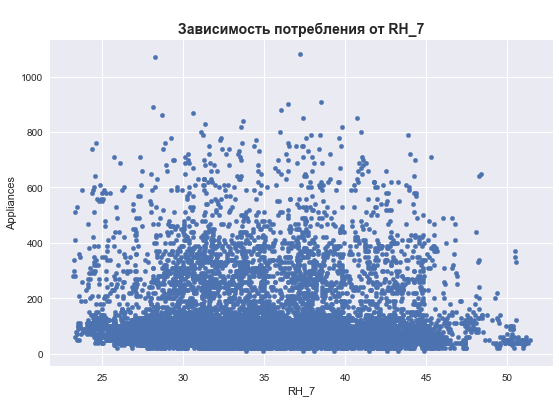

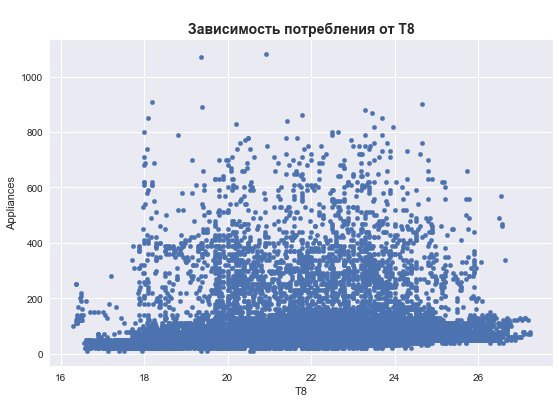

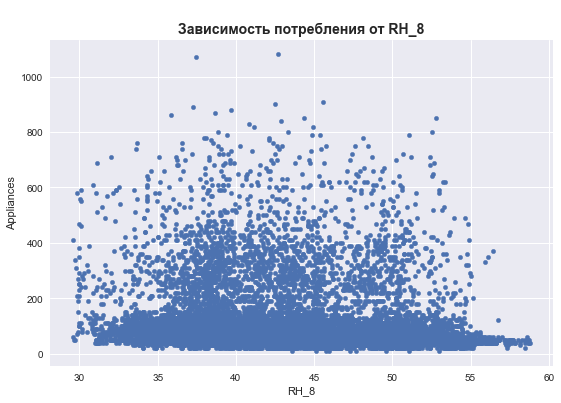

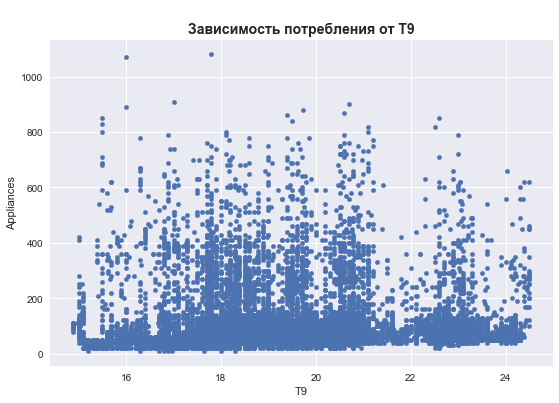

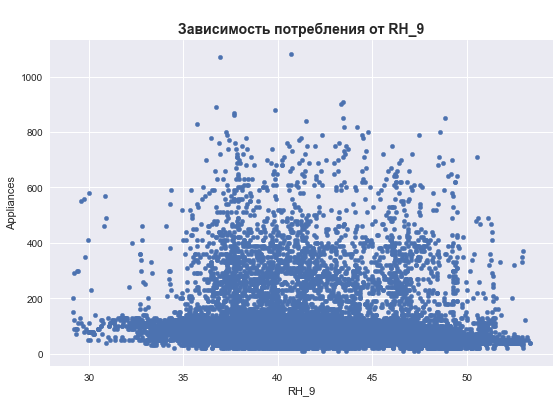

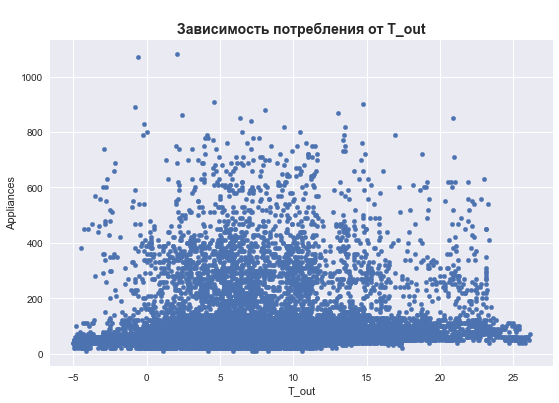

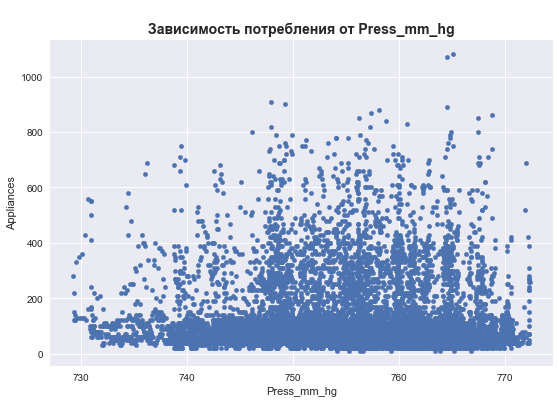

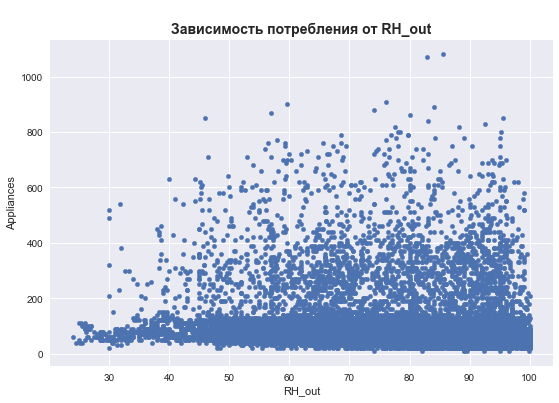

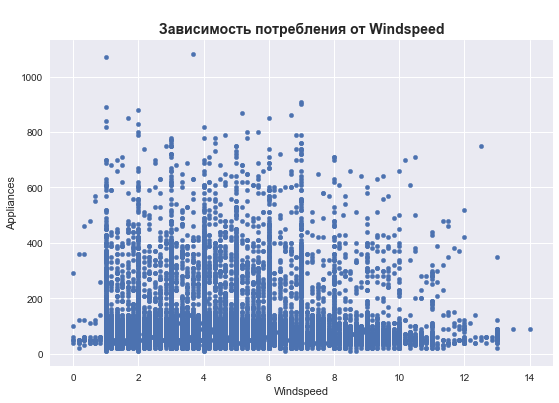

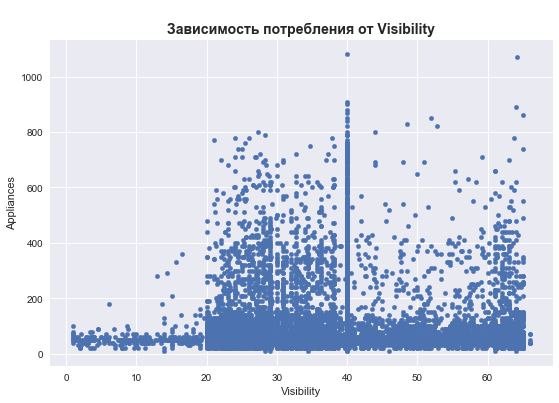

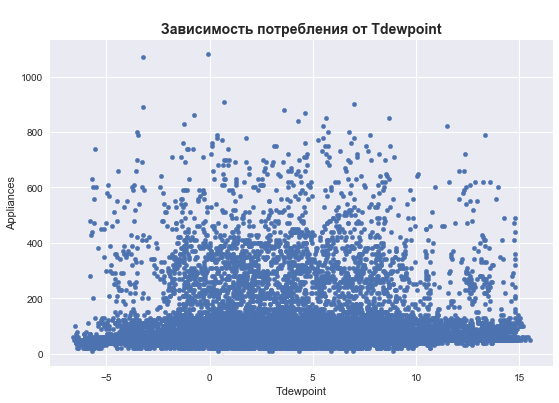

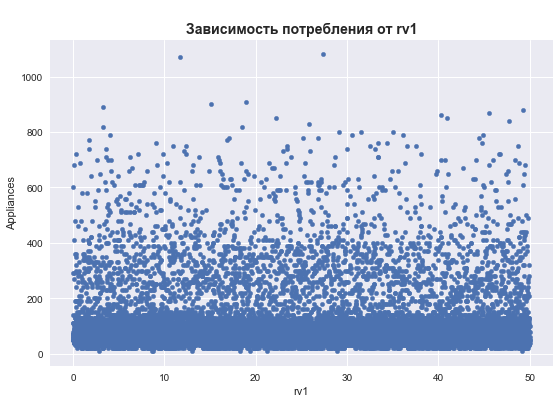

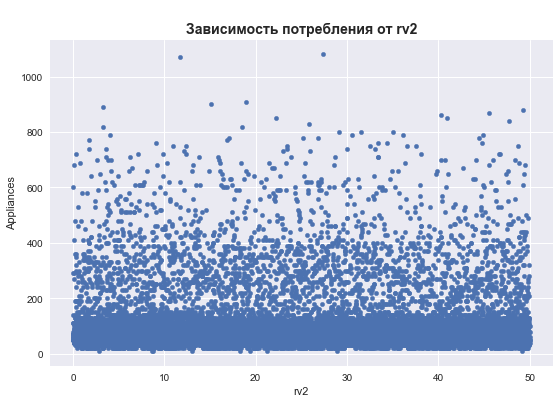

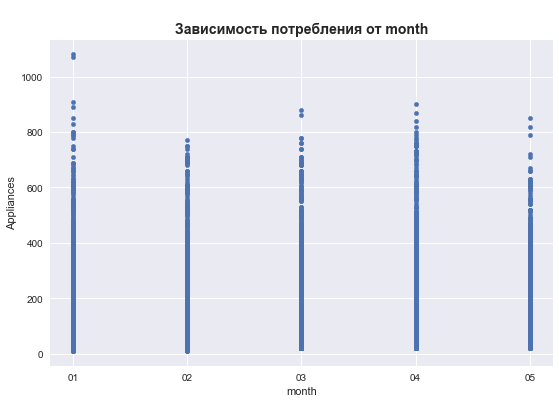

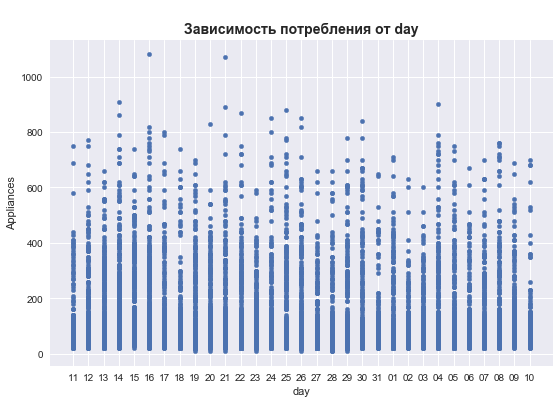

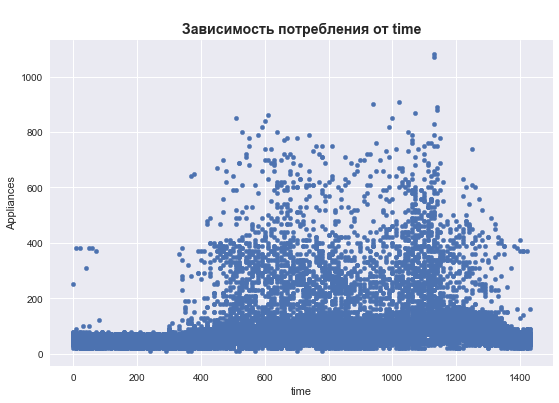

In [31]:
for i in df.drop(columns=['Appliances']).columns:
    df.plot.scatter(x=i, y='Appliances', figsize=(9,6),)
    plt.title('\nЗависимость потребления от '+i, fontsize=14, fontweight='bold');

In [37]:
df.dtypes

Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
month           object
day             object
time             int64
dtype: object

In [40]:
df['month'] = df['month'].astype('int64')
df['day'] = df['day'].astype('int64')

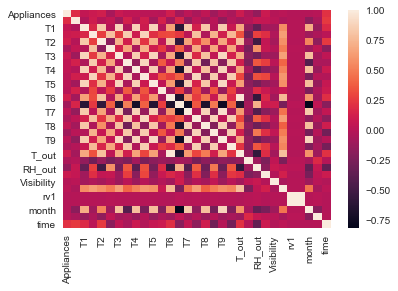

In [42]:
sns.heatmap(df.corr())

#### Долго думал, удалять ли случайные переменные, и решил что он не нужны

In [45]:
df_clear = df = df.drop(columns=['rv1', 'rv2'])

## Модели

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

import xgboost as xgb

D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Выделяю целевую и разбиваю выборку

In [46]:
target = df_clear[['Appliances']]

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(df_clear.drop(columns=['Appliances']), target, test_size=0.2, random_state=18)

#### Обучаю модели без параметров

In [48]:
reg = LinearRegression().fit(X_train, Y_train)
predict = reg.predict(X_test)

print("Точность на трэйновой выборке: ", reg.score(X_train, Y_train))
print("Точность на тестовой выборке: ", reg.score(X_test, Y_test))
print("mean_absolute_error : ", mean_absolute_error(Y_test, predict))
print("mean_squared_error : ", np.sqrt(mean_squared_error(Y_test, predict)))

Точность на трэйновой выборке:  0.16718859974366584
Точность на тестовой выборке:  0.17406097200828186
mean_absolute_error :  50.15454655210925
mean_squared_error :  87.296020299531


In [49]:
reg = Lasso().fit(X_train, Y_train)
predict = reg.predict(X_test)

print("Точность на трэйновой выборке: ", reg.score(X_train, Y_train))
print("Точность на тестовой выборке: ", reg.score(X_test, Y_test))
print("mean_absolute_error : ", mean_absolute_error(Y_test, predict))
print("mean_squared_error : ", np.sqrt(mean_squared_error(Y_test, predict)))

Точность на трэйновой выборке:  0.16393671149716238
Точность на тестовой выборке:  0.17324991746415497
mean_absolute_error :  49.864347667297324
mean_squared_error :  87.33887119929757


In [50]:
reg = Ridge().fit(X_train, Y_train)
predict = reg.predict(X_test)

print("Точность на трэйновой выборке: ", reg.score(X_train, Y_train))
print("Точность на тестовой выборке: ", reg.score(X_test, Y_test))
print("mean_absolute_error : ", mean_absolute_error(Y_test, predict))
print("mean_squared_error : ", np.sqrt(mean_squared_error(Y_test, predict)))

Точность на трэйновой выборке:  0.16718859641611983
Точность на тестовой выборке:  0.17406323773860177
mean_absolute_error :  50.15415312957275
mean_squared_error :  87.2959005634676


In [51]:
reg = RandomForestRegressor().fit(X_train, Y_train)
predict = reg.predict(X_test)

print("Точность на трэйновой выборке: ", reg.score(X_train, Y_train))
print("Точность на тестовой выборке: ", reg.score(X_test, Y_test))
print("mean_absolute_error : ", mean_absolute_error(Y_test, predict))
print("mean_squared_error : ", np.sqrt(mean_squared_error(Y_test, predict)))

Точность на трэйновой выборке:  0.913542024168307
Точность на тестовой выборке:  0.5021979359609163
mean_absolute_error :  31.95262224474284
mean_squared_error :  67.77176522073952


In [52]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [53]:
reg = RandomForestRegressor().fit(X_train, Y_train)
predict = reg.predict(X_test)

print("Точность на трэйновой выборке: ", reg.score(X_train, Y_train))
print("Точность на тестовой выборке: ", reg.score(X_test, Y_test))
print("mean_absolute_error : ", mean_absolute_error(Y_test, predict))
print("mean_squared_error : ", np.sqrt(mean_squared_error(Y_test, predict)))

Точность на трэйновой выборке:  0.9123235524343162
Точность на тестовой выборке:  0.5050526762023894
mean_absolute_error :  31.228527995946287
mean_squared_error :  67.5771608073457


In [54]:
booster = xgb.XGBRegressor()
booster.fit(X_train, Y_train)
predict = booster.predict(X_test)
print("Точность на трэйновой выборке: ", booster.score(X_train, Y_train))
print("Точность на тестовой выборке: ", booster.score(X_test, Y_test))
print("mean_absolute_error: ", mean_absolute_error(Y_test, predict))
print("mean_squared_error: ", np.sqrt(mean_squared_error(Y_test, predict)))

Точность на трэйновой выборке:  0.8505474174845556
Точность на тестовой выборке:  0.5314222181793251
mean_absolute_error:  33.31379055113076
mean_squared_error:  65.75235273188328


#### Вроде бы XGBoost показал себя лучше всех, займемся оптимизацией гиперпараметров

In [58]:
booster = xgb.XGBRegressor()

param_grid = {'n_estimators': [150, 250],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [6, 8, 10],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.25]}

booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1, verbose=True)

booster_grid_search.fit(X_train, Y_train)

print(booster_grid_search.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\externals\joblib\numpy_pickle.py:93: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  7.8min finished


{'colsample_bytree': 0.6, 'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 250}


In [59]:
booster = xgb.XGBRegressor(colsample_bytree=0.6 , gamma=0.25 , learning_rate=0.1 , 
                           max_depth=10 , n_estimators=250 )

booster.fit(X_train, Y_train)
predict = booster.predict(X_test)
print("Точность на трэйновой выборке: ", booster.score(X_train, Y_train))
print("Точность на тестовой выборке: ", booster.score(X_test, Y_test))
print("mean_absolute_error: ", mean_absolute_error(Y_test, predict))
print("mean_squared_error: ", np.sqrt(mean_squared_error(Y_test, predict)))

Точность на трэйновой выборке:  0.9810639147103962
Точность на тестовой выборке:  0.5979752767437599
mean_absolute_error:  28.473831737316317
mean_squared_error:  60.90414236896497


#### Точность немного повысилась, а средняя квадратичная ошибка понизилась, однако модель ужасно переобучена